In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dt_baseball = pd.read_csv('mlbbat10.csv')

In [3]:
dt_baseball

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,B Wood,KC,P,3,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1195,M Wuertz,OAK,P,4,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1196,M Zagurski,PHI,P,7,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000
1197,B Ziegler,OAK,P,6,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000


The general statistics for each team are:

c:\Users\samyl\OneDrive\Documentos\baseball-project\baseball\env\lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


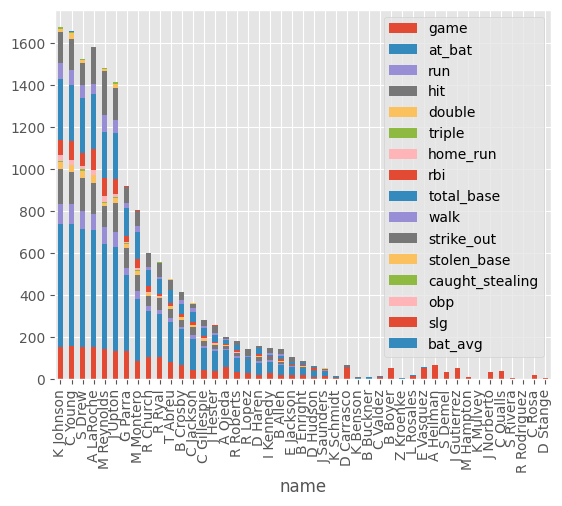

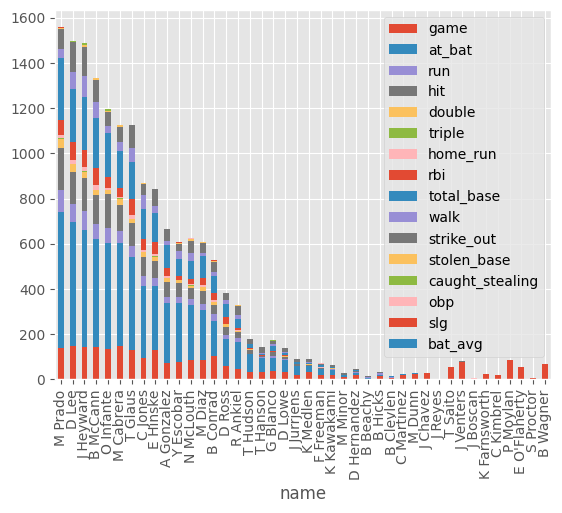

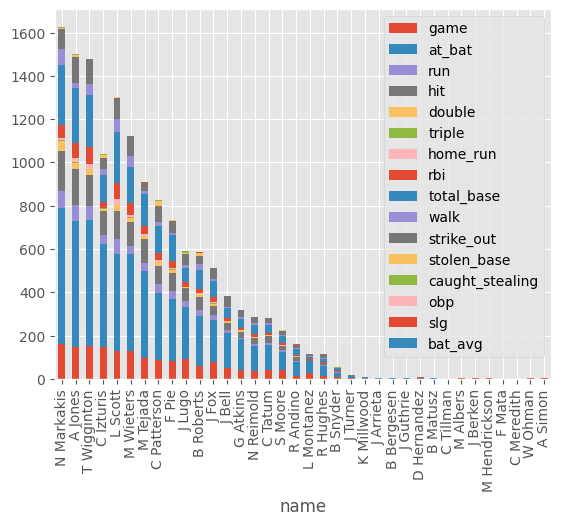

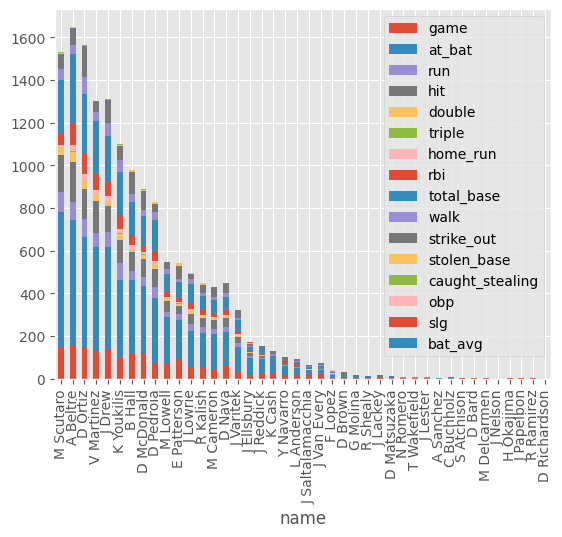

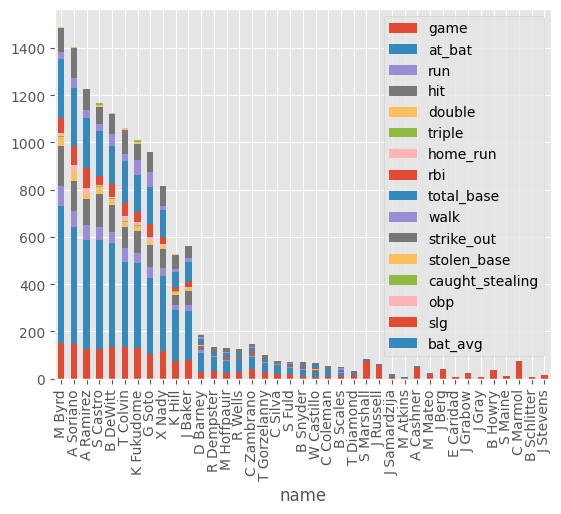

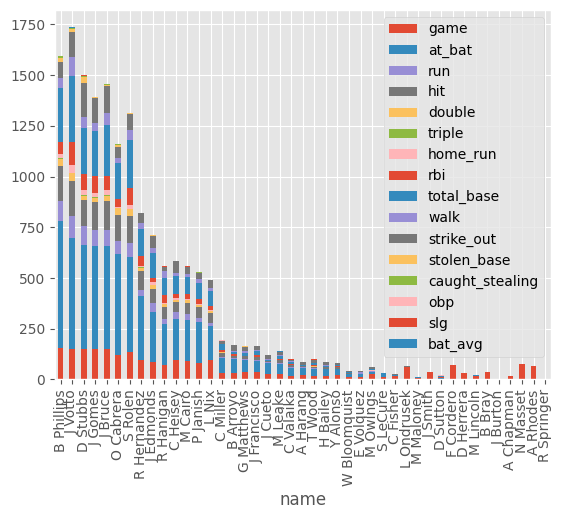

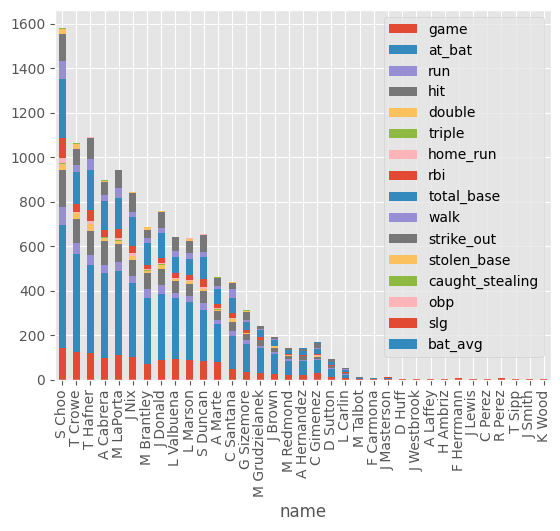

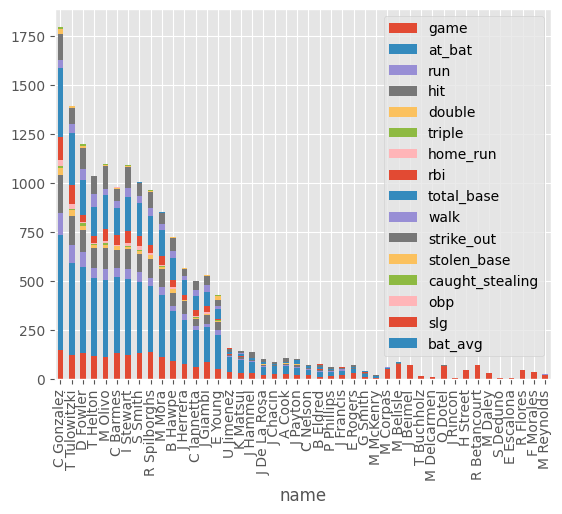

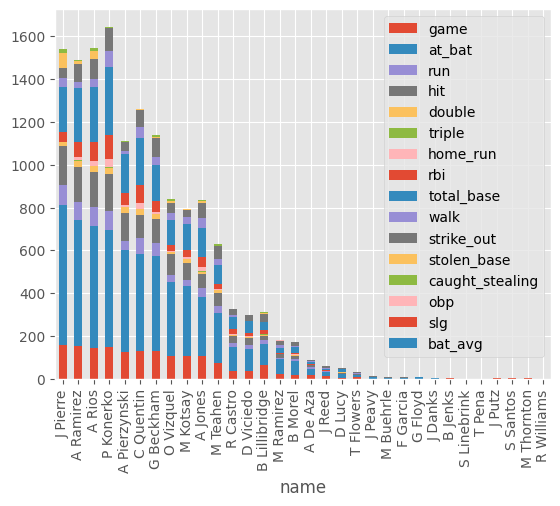

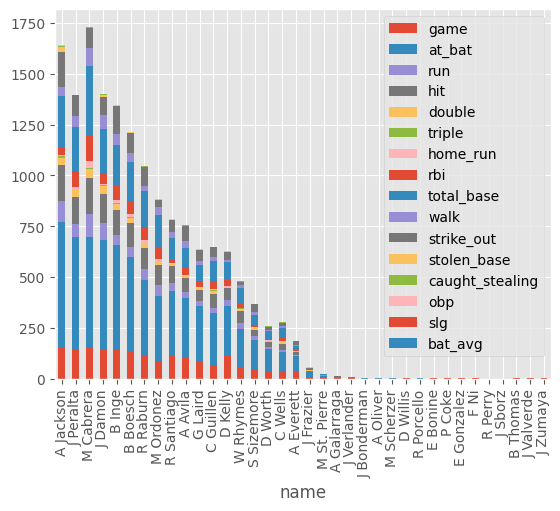

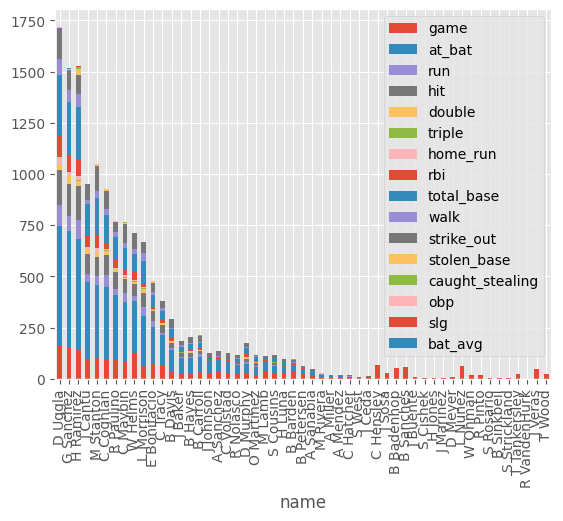

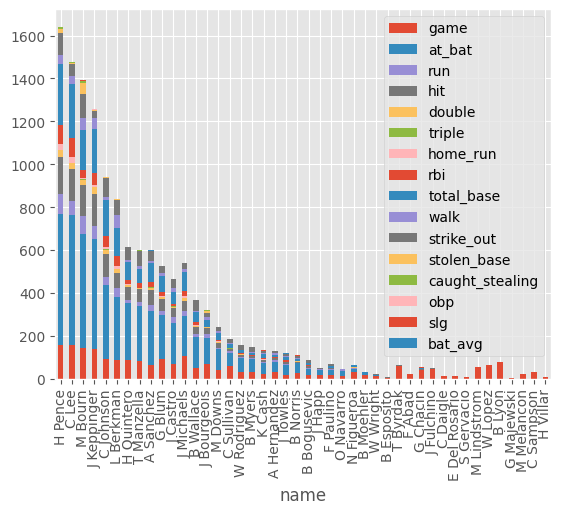

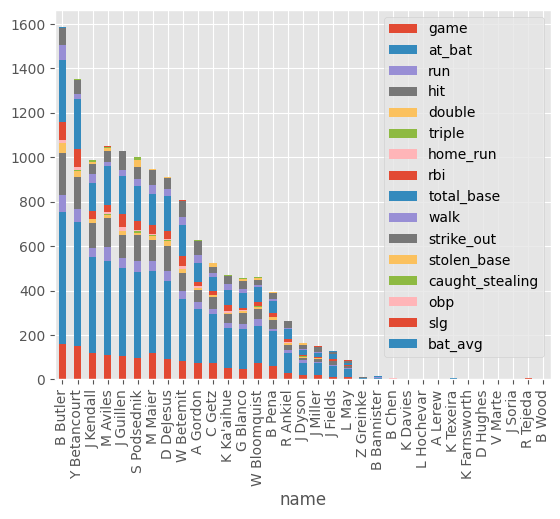

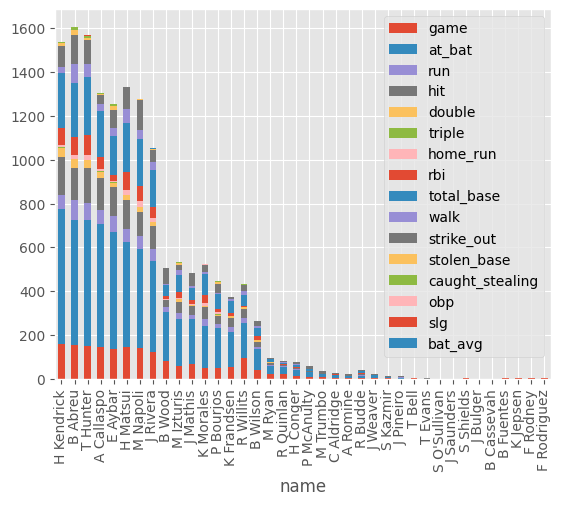

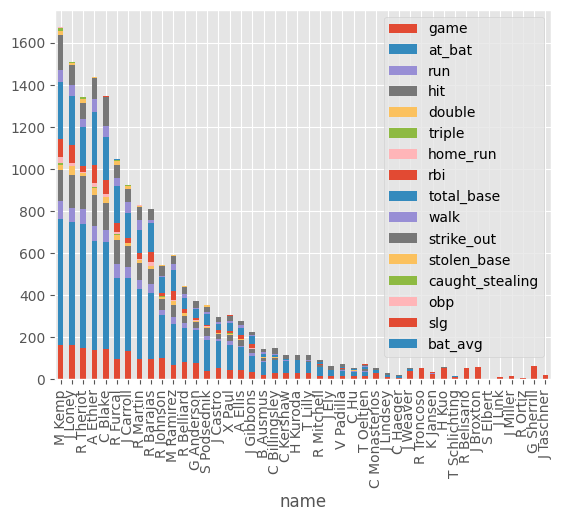

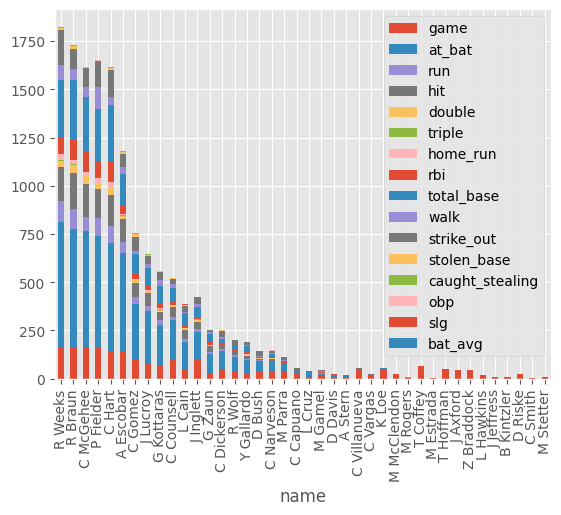

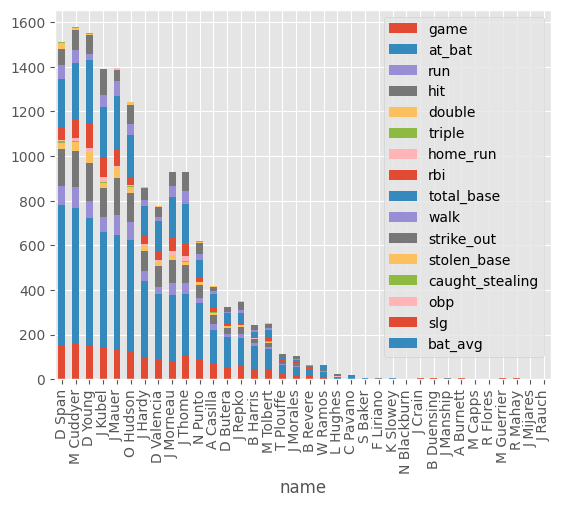

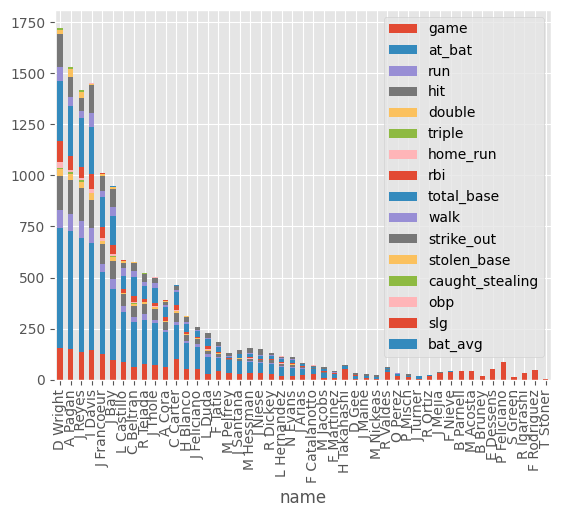

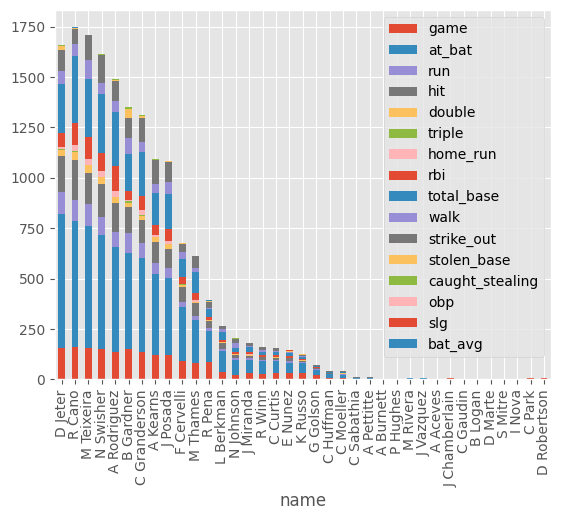

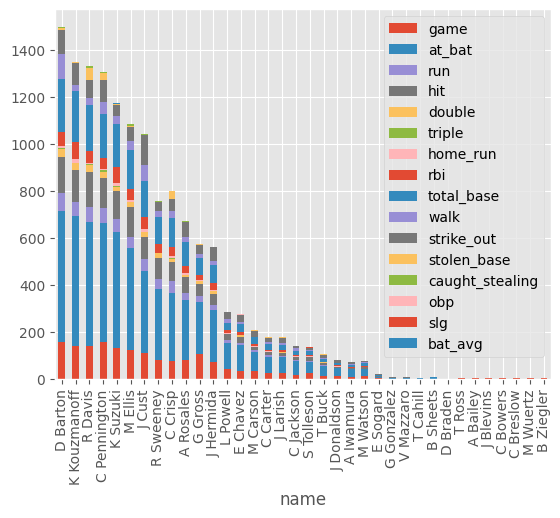

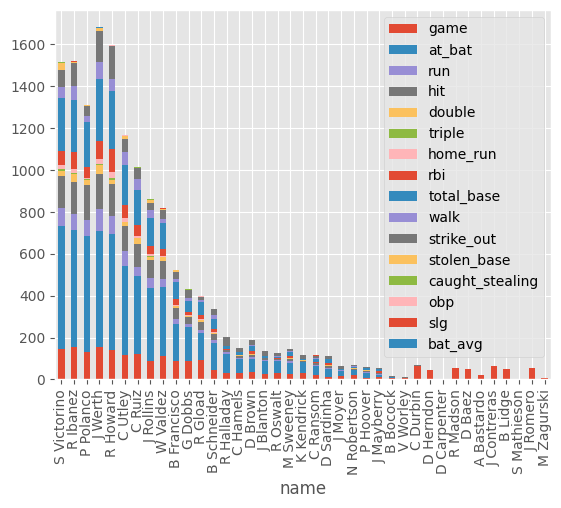

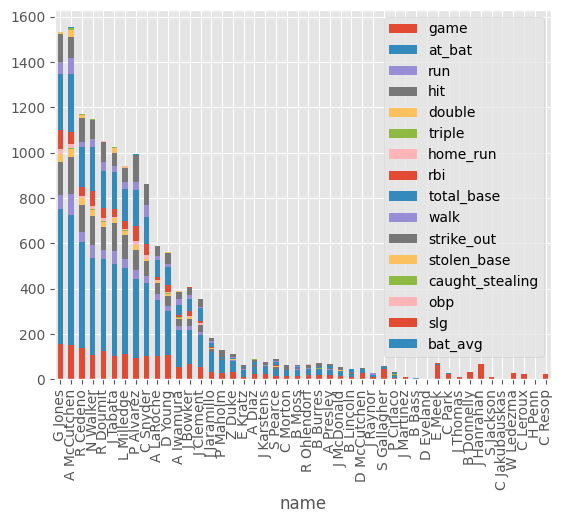

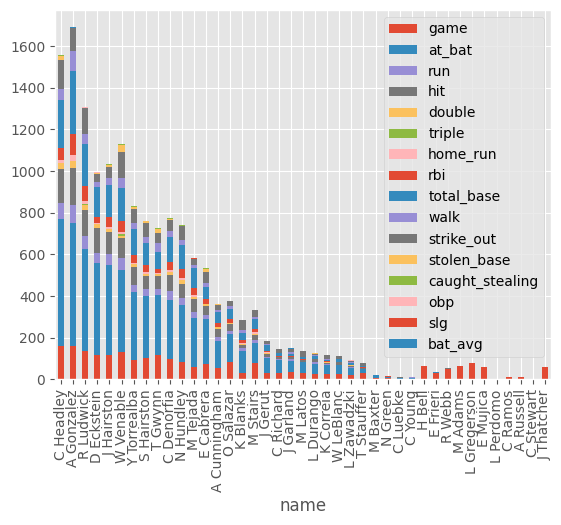

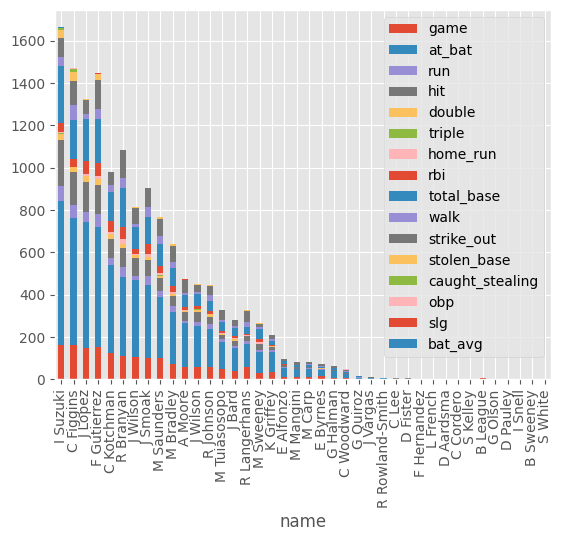

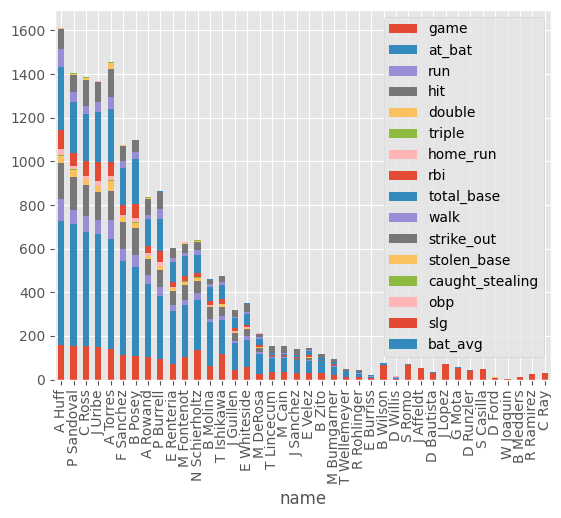

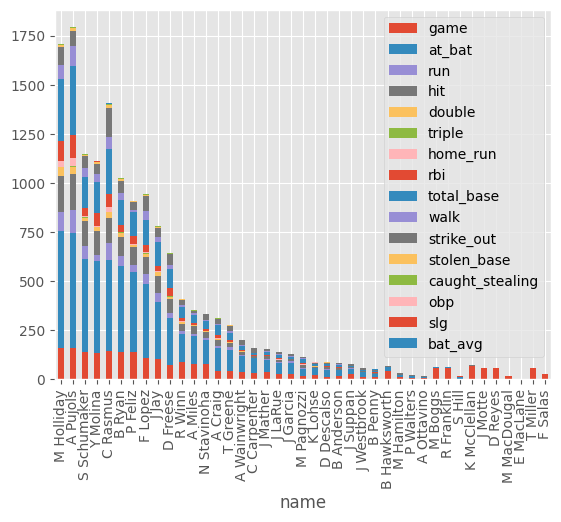

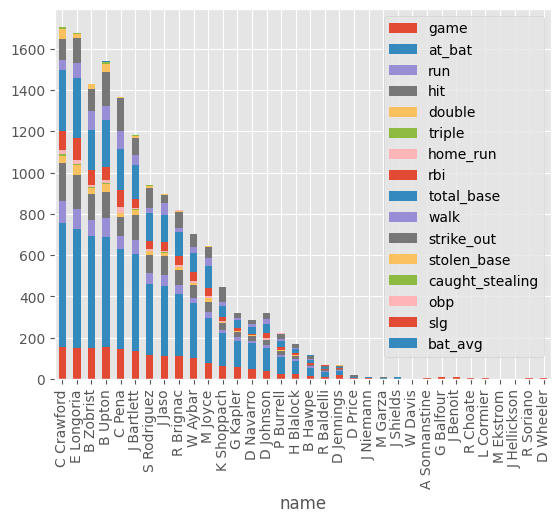

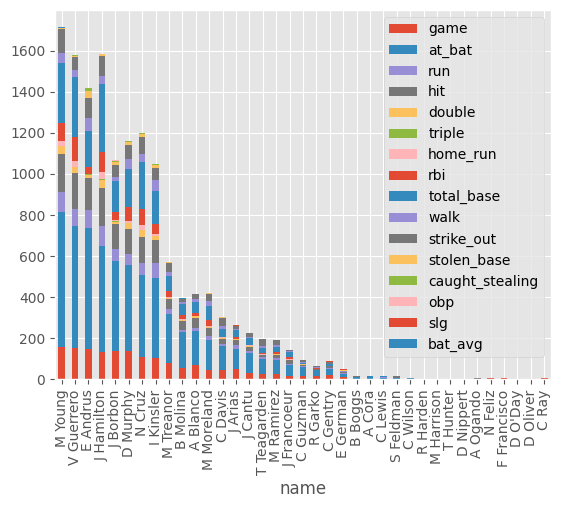

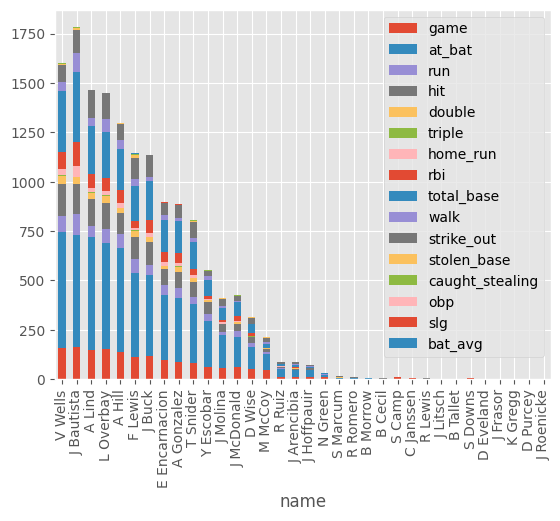

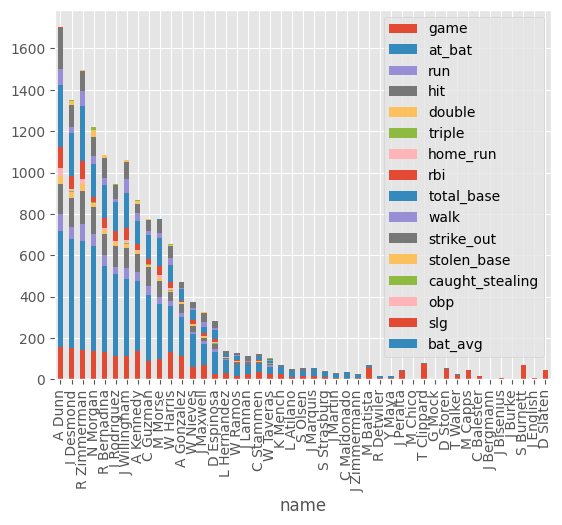

In [84]:
dt_baseball.groupby("team").plot(kind="bar", x="name", stacked="True");

The first thing to do is view the statistics of each player on the yankees team.

<Axes: xlabel='name'>

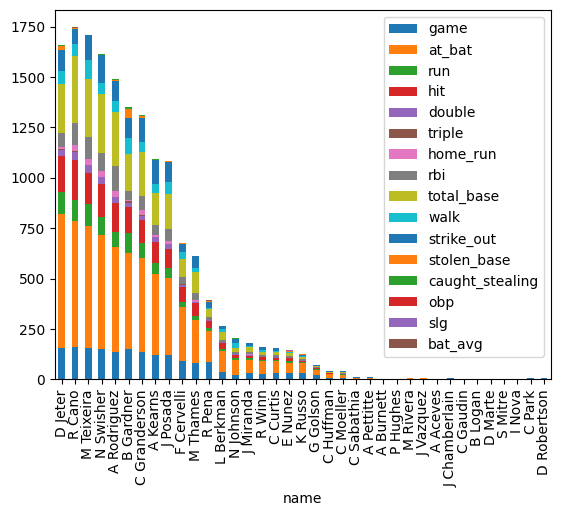

In [5]:
yankees = dt_baseball.loc[dt_baseball["team"]=="NYY"]
yankees.plot(kind="bar", x="name", stacked=True)

Comparing the winner of the ***American League Championship Series*** to the ***National League Championship Series***

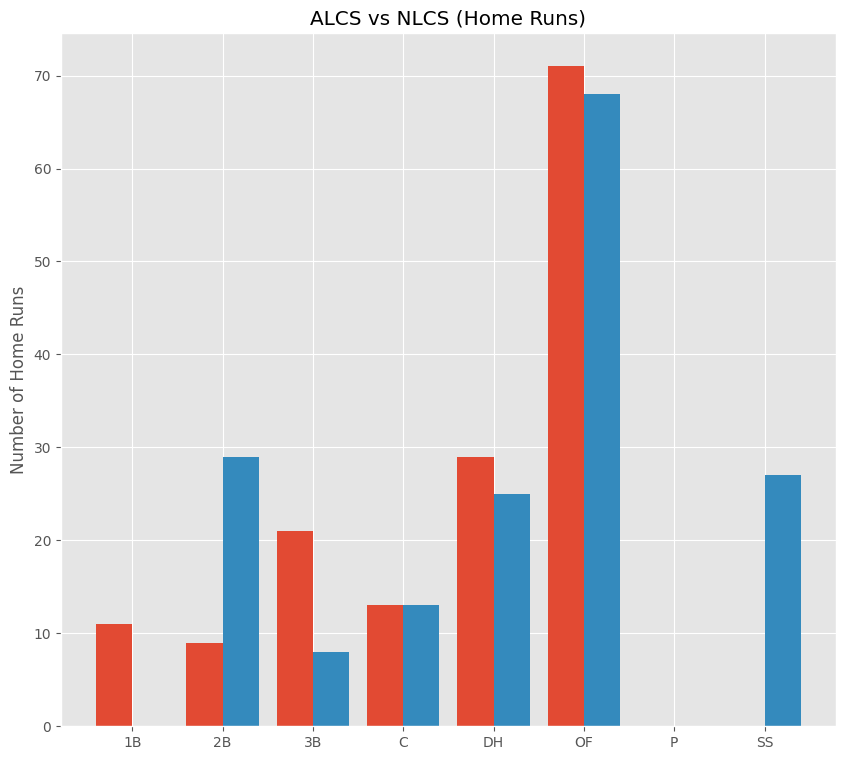

In [61]:
#calculating the values ​​of each champion by position
alcs_champions = dt_baseball.loc[dt_baseball["team"]=="TEX"].groupby(["position"]).sum()
nlcs_champions = dt_baseball.loc[dt_baseball["team"]=="SF"].groupby(["position"]).sum()

#determining the values ​​of home runs by position and the index of the positions that exist
alcs_homerun = alcs_champions["home_run"].values
index_champions = alcs_champions.index
nlcs_homerun = nlcs_champions["home_run"].values

home_run_champions = pd.DataFrame({'alcs': alcs_homerun,
                   'nlcs': nlcs_homerun}, index=index_champions )

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 9))

x = np.arange(len(index_champions))

ax.bar(x - 0.40/2, alcs_homerun, width=0.40)
ax.bar(x + 0.40/2, nlcs_homerun, width=0.40)

ax.set_ylabel("Number of Home Runs")
ax.set_title("ALCS vs NLCS (Home Runs)")
ax.set_xticks(x)
ax.set_xticklabels(index_champions)
plt.show()


### New York Yankees Analysis

I want to analyze the yankees players, how many home runs have the players on this team hit? Who did the most? Who did the least?

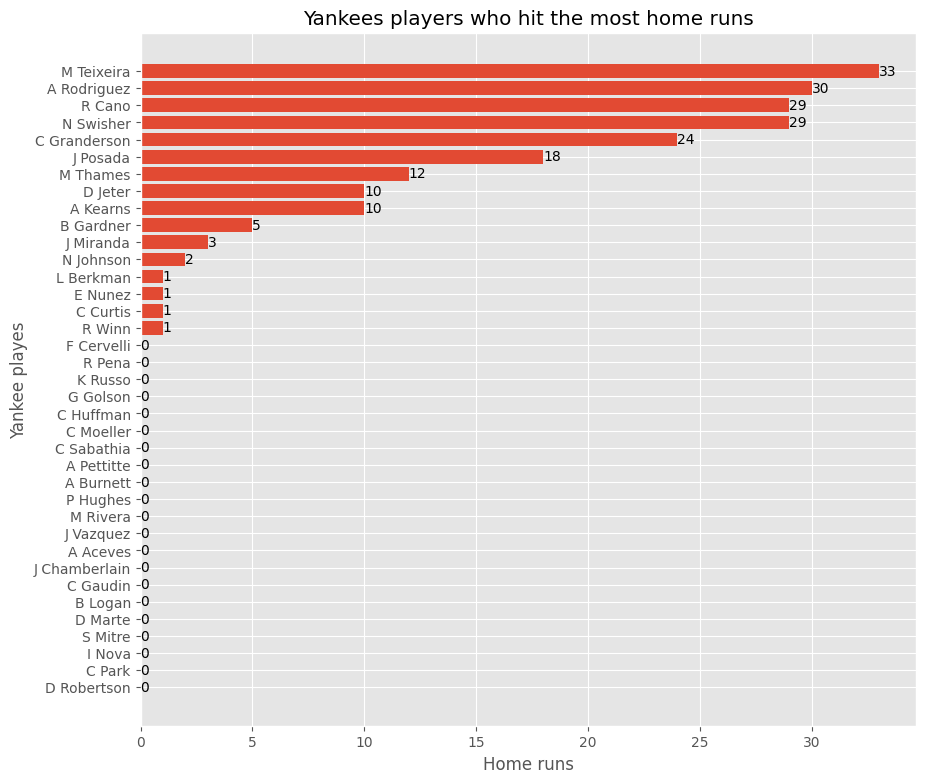

In [83]:
players_yankees = dt_baseball.loc[dt_baseball["team"]=="NYY"].set_index('name').sort_values(by="home_run", ascending=False)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 9))

graph_yankees = ax.barh(players_yankees.index, players_yankees["home_run"])
ax.set_xlabel("Home runs")
ax.set_ylabel("Yankee playes")
ax.invert_yaxis()
ax.bar_label(graph_yankees, label_type="edge");
ax.set_title("Yankees players who hit the most home runs");



### General Analysis

Looking at all the team statistics.

<Axes: title={'center': 'at bat for each team'}, xlabel='team'>

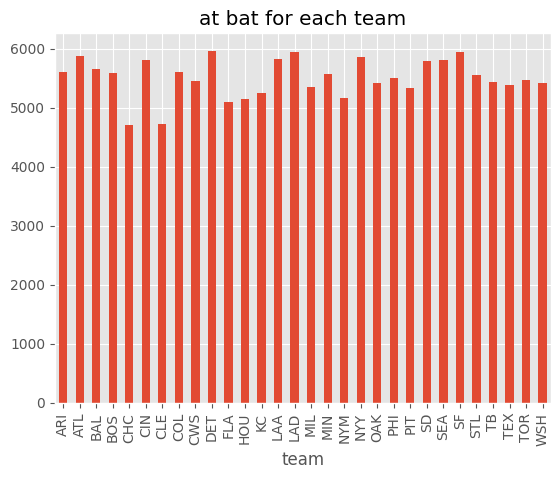

In [116]:
team = dt_baseball.groupby("team")["at_bat"].sum()
team.plot(kind="bar", title="at bat for each team")


<Axes: title={'center': 'runs for each team'}, xlabel='team'>

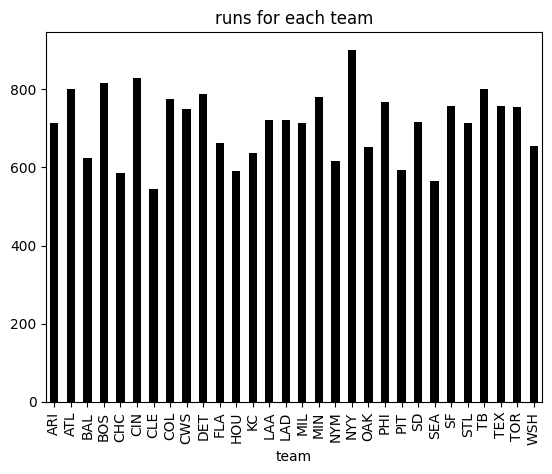

In [9]:
team = dt_baseball.groupby("team")["run"].sum()
team.plot(kind="bar", title="runs for each team", color="black")

<Axes: title={'center': 'hits for each team'}, xlabel='team'>

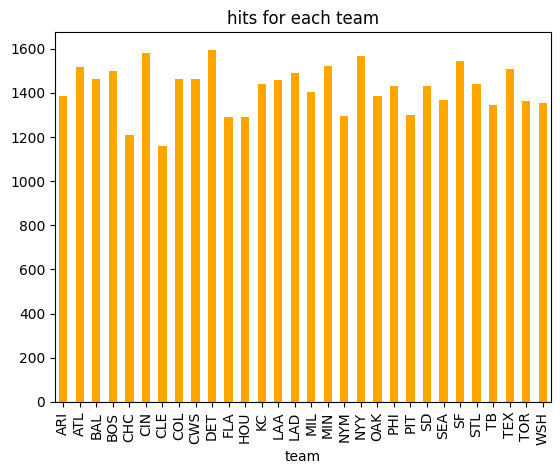

In [10]:
team = dt_baseball.groupby("team")["hit"].sum()
team.plot(kind="bar", title="hits for each team", color="orange")

<Axes: title={'center': 'doubles for each team'}, xlabel='team'>

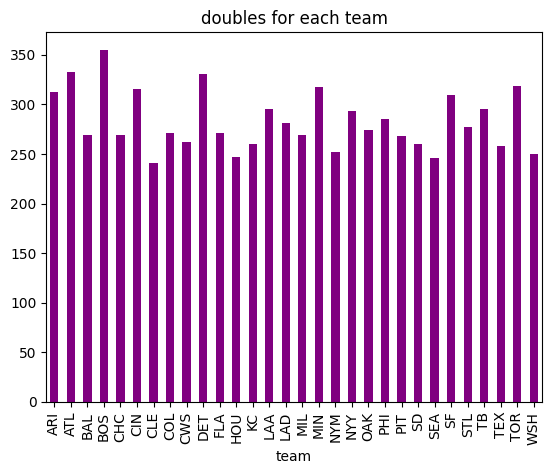

In [11]:
team = dt_baseball.groupby("team")["double"].sum()
team.plot(kind="bar", title="doubles for each team", color="purple")

<Axes: title={'center': 'triples for each team'}, xlabel='team'>

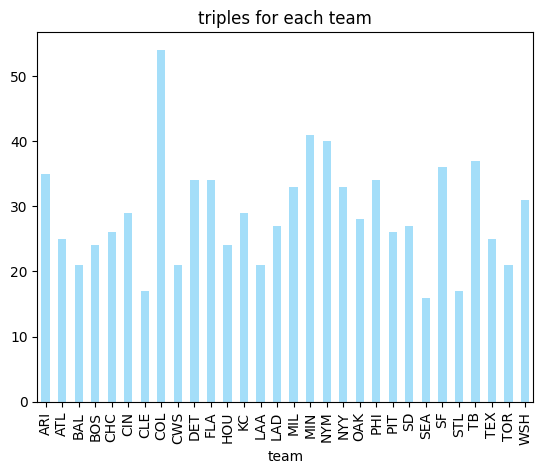

In [12]:
team = dt_baseball.groupby("team")["triple"].sum()
team.plot(kind="bar", title="triples for each team", color="#a4def9")

<Axes: title={'center': 'homeruns for each team'}, xlabel='team'>

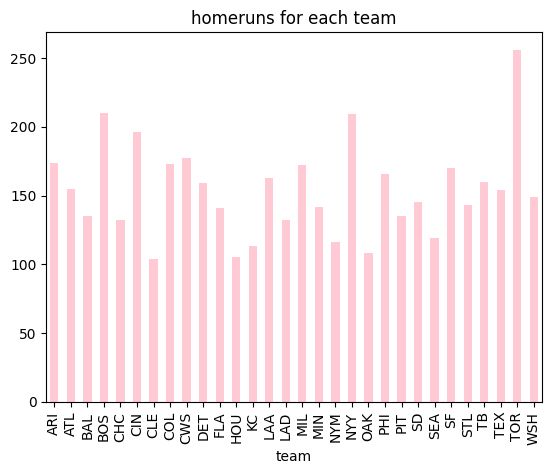

In [13]:
team = dt_baseball.groupby("team")["home_run"].sum()
team.plot(kind="bar", title="homeruns for each team", color="#FFCAD4")

<Axes: title={'center': 'runs batted in for each team'}, xlabel='team'>

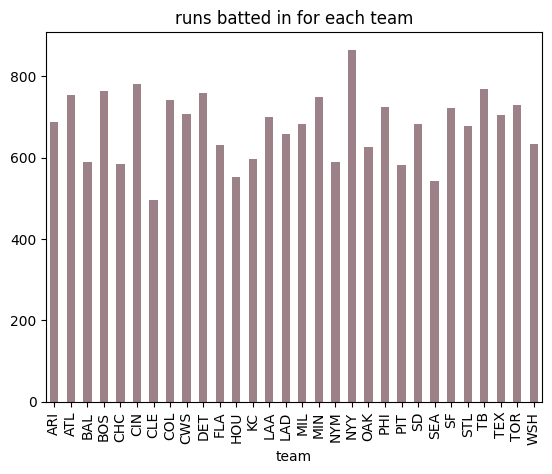

In [14]:
team = dt_baseball.groupby("team")["rbi"].sum()
team.plot(kind="bar", title="runs batted in for each team", color="#9D8189")

<Axes: title={'center': 'total bases for each team'}, xlabel='team'>

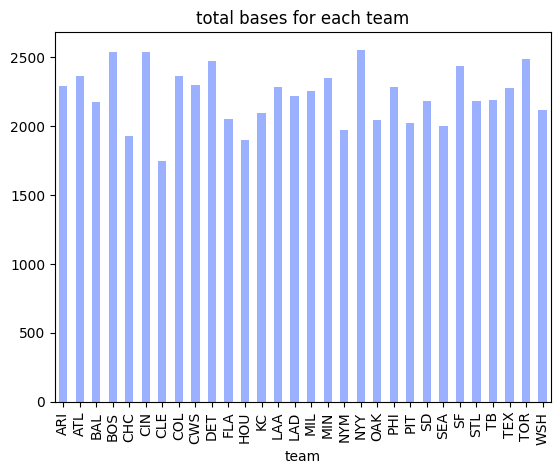

In [15]:
team = dt_baseball.groupby("team")["total_base"].sum()
team.plot(kind="bar", title="total bases for each team", color="#9BB1FF")

<Axes: title={'center': 'walks for each team'}, xlabel='team'>

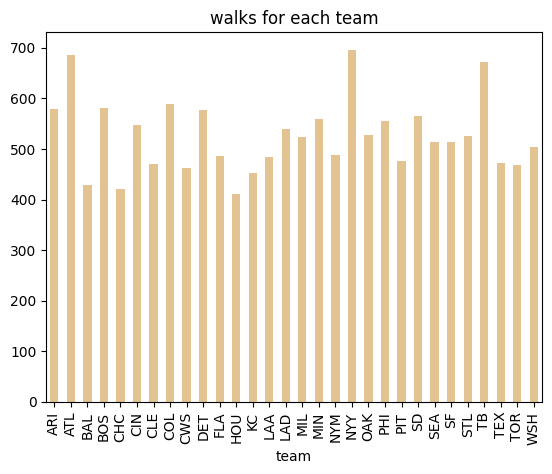

In [16]:
team = dt_baseball.groupby("team")["walk"].sum()
team.plot(kind="bar", title="walks for each team", color="#E2C391")

<Axes: title={'center': 'strike outs for each team'}, xlabel='team'>

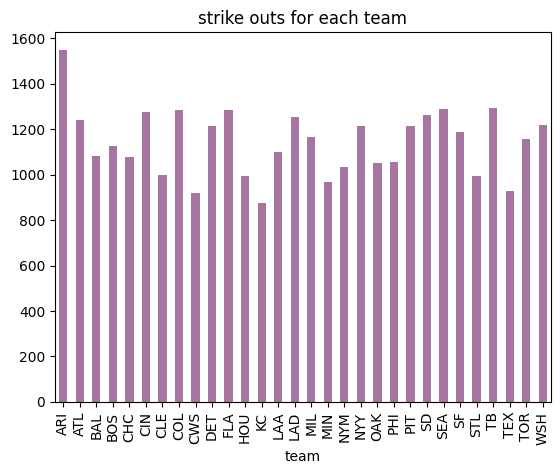

In [17]:
team = dt_baseball.groupby("team")["strike_out"].sum()
team.plot(kind="bar", title="strike outs for each team", color="#A675A1")

<Axes: title={'center': 'stolen bases for each team'}, xlabel='team'>

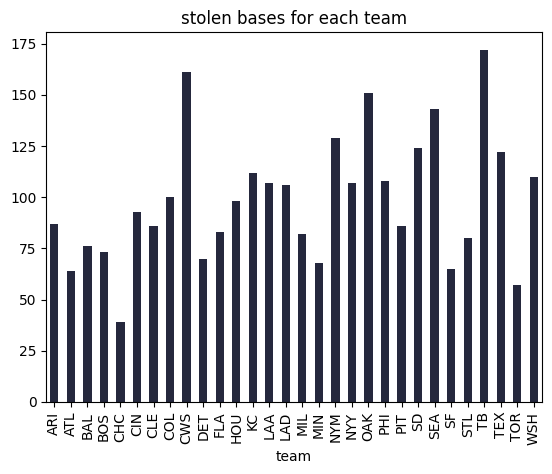

In [18]:
team = dt_baseball.groupby("team")["stolen_base"].sum()
team.plot(kind="bar", title="stolen bases for each team", color="#25283D")

<Axes: title={'center': 'caught stealing for each team'}, xlabel='team'>

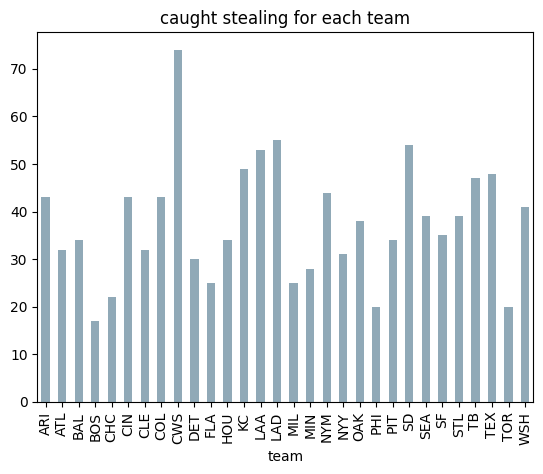

In [19]:
team = dt_baseball.groupby("team")["caught_stealing"].sum()
team.plot(kind="bar", title="caught stealing for each team", color="#90A9B7")

<Axes: title={'center': 'sum of on base percentage for each team'}, xlabel='team'>

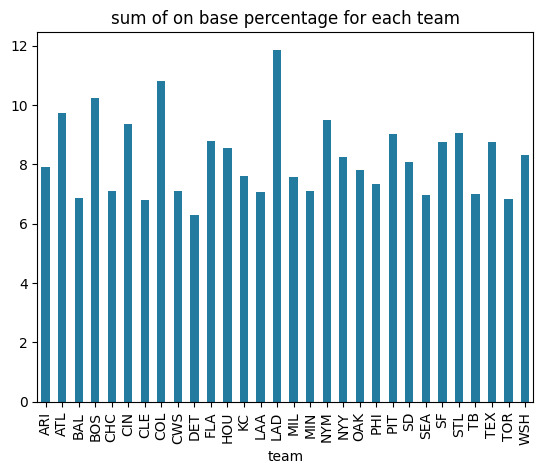

In [20]:
team = dt_baseball.groupby("team")["obp"].sum()
team.plot(kind="bar", title="sum of on base percentage for each team", color="#247BA0")

<Axes: title={'center': 'slugging percentage for each team'}, xlabel='team'>

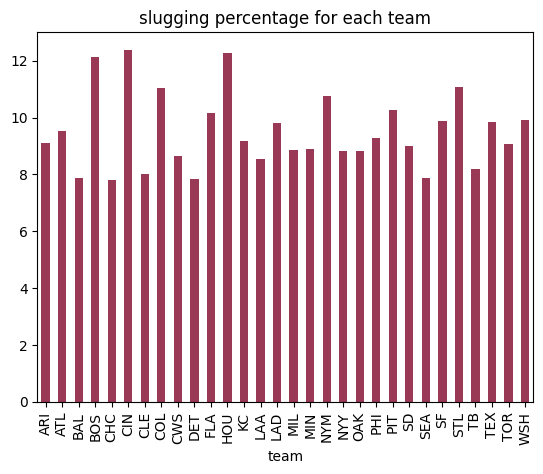

In [21]:
team = dt_baseball.groupby("team")["slg"].sum()
team.plot(kind="bar", title="slugging percentage for each team", color="#993955")

<Axes: title={'center': 'bat average for each team'}, xlabel='team'>

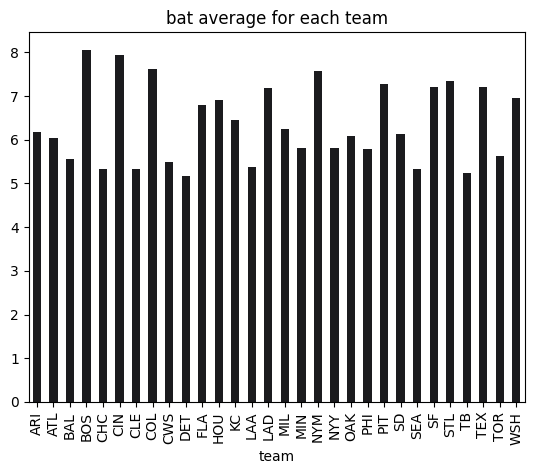

In [22]:
team = dt_baseball.groupby("team")["bat_avg"].sum()
team.plot(kind="bar", title="bat average for each team", color="#1B1B1E")